In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd gdrive/MyDrive/CSE4095\ -\ NLP/Delivery-4/

/content/gdrive/MyDrive/CSE4095 - NLP/Delivery-4


In [3]:
! pip install fasttext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 68 kB 3.0 MB/s 
  Using cached pybind11-2.9.2-py2.py3-none-any.whl (213 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3143999 sha256=cb4bd75446bc7080c9acc4065e930693b2f2942731b8a364a1189e4596a8bd88
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext


In [4]:
import tensorflow as tf
import fasttext
import json
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [5]:
dataset = {}
with open('data/dataset.json', encoding='utf-8') as fr:
    dataset = json.load(fr)

In [6]:
labels = {}
with open('data/labels.json', encoding='utf-8') as fr:
    labels = json.load(fr)

In [7]:
splitted_data = {}
with open('data/splitted_data.json', encoding='utf-8') as fr:
    splitted_data = json.load(fr)

In [8]:
X_train, X_test, y_train, y_test = [], [], [], []

for key in ['train', 'test']:
    for i in range(len(splitted_data[f'X_{key}'])):
        exec(f"X_{key}.append(dataset[splitted_data['X_{key}'][i]])")
        exec(f"y_{key}.append(splitted_data['y_{key}'][i])")

In [9]:
with open('data/dataset.txt', 'w', encoding='utf-8') as fw:
    for key in dataset:
        fw.write(f'{dataset[key]}\n')

In [10]:
with open('data/data.train.txt', 'w', encoding='utf-8') as fw:
    for i in range(len(X_train)):
        label = '-'.join(y_train[i].split())
        fw.write(f'__label__{label} {X_train[i]}\n')

with open('data/data.test.txt', 'w', encoding='utf-8') as fw:
    for i in range(len(X_test)):
        label = '-'.join(y_test[i].split())
        fw.write(f'__label__{label} {X_test[i]}\n')

In [11]:
model = fasttext.train_supervised('data/data.train.txt', dim=512, epoch=50)

In [14]:
model.save_model('results/fastttext_model.bin')

In [15]:
lines = []
with open('data/data.test.txt', encoding='utf-8') as fr:
    lines = fr.readlines()

In [16]:
y_pred = []
y_true = []
for test_instance in lines:
    text, label = ' '.join(test_instance.split()[1:]), test_instance.split()[0]
    predicted_label = model.predict(text)[0][0]
    y_pred.append(predicted_label[9:])
    y_true.append(label[9:])

In [17]:
le = LabelEncoder()
le.fit(y_true)
y_true = le.transform(y_true)
y_pred = le.transform(y_pred)

In [18]:
cr = classification_report(y_true, y_pred, target_names=le.classes_)
print(cr)

                        precision    recall  f1-score   support

 Asliye-Ceza-Mahkemesi       0.91      0.94      0.92      1998
Asliye-Hukuk-Mahkemesi       0.78      0.83      0.80       393
   Ağır-Ceza-Mahkemesi       0.80      0.71      0.75       380
Bölge-Adliye-Mahkemesi       0.95      0.94      0.95       487
          Ceza-Dairesi       0.98      0.95      0.96       219
                 EMPTY       0.93      0.96      0.94      1325
                 OTHER       0.83      0.62      0.71       241
     Ticaret-Mahkemesi       0.64      0.61      0.62        84
       Çocuk-Mahkemesi       0.65      0.61      0.63       179
          İş-Mahkemesi       0.93      0.93      0.93       263

              accuracy                           0.89      5569
             macro avg       0.84      0.81      0.82      5569
          weighted avg       0.89      0.89      0.89      5569



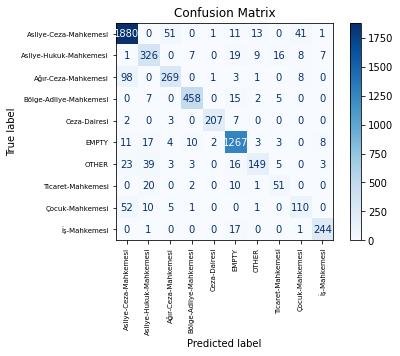

In [19]:
disp = ConfusionMatrixDisplay.from_predictions(
        y_true,
        y_pred,
        display_labels=le.classes_,
        cmap=plt.cm.Blues,
        normalize=None,
    )
disp.ax_.set_title('Confusion Matrix')

plt.xticks(rotation = 90, fontsize=7)
plt.yticks(fontsize=7)
plt.savefig('results/fasttext_cm.png', dpi=300, bbox_inches='tight')